In [272]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [273]:
pd.set_option('display.max_columns', None)

In [274]:
df = pd.read_csv('cleaned_dataset_v3.csv')

In [275]:
df.sample()

,PROP_ID,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,BALCONY_NUM,AREA,Price_per_sqft,FURNISH,FACING,AGE,TOTAL_FLOOR,PROP_NAME,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,FLOOR_NUM,PRICE,feature_luxury,amenity_luxury,LATITUDE,LONGITUDE
290,V70928956,"There is a 3 BHK apartment in Kamalgazi, Kolka...",flat,Kolkata South,3.0,NaN,1360,5172.0,Unfurnished,0,6,12.0,Rajwada Springfield,"['2 Metro Stations', '2 Shoppings', '3 Connect...",Rajwada Springfield,Rajwada Springfield,Kamalgazi,1,0.7,NaN,NaN,22.43858,88.395019


In [276]:
df.shape

(5171, 23)

In [277]:
df.duplicated().sum()

0

In [278]:
df.isnull().sum()

PROP_ID                         0
DESCRIPTION                     0
PROPERTY_TYPE                   0
CITY                            0
BEDROOM_NUM                     0
BALCONY_NUM                   472
AREA                            0
Price_per_sqft                  0
FURNISH                         0
FACING                          0
AGE                             0
TOTAL_FLOOR                     0
PROP_NAME                      84
FORMATTED_LANDMARK_DETAILS    158
SOCIETY_NAME                   84
BUILDING_NAME                  97
location                        0
FLOOR_NUM                       6
PRICE                           0
feature_luxury                729
amenity_luxury                663
LATITUDE                        0
LONGITUDE                       0
dtype: int64

### PROPERTY_TYPE:

In [279]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
flat     5165
house       6
Name: count, dtype: int64

<Axes: xlabel='PROPERTY_TYPE'>

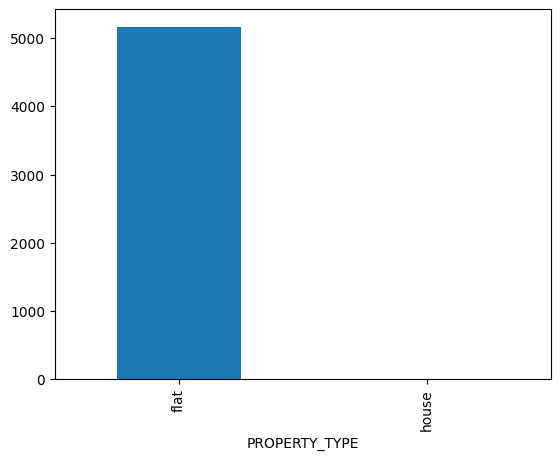

In [280]:
df['PROPERTY_TYPE'].value_counts().plot(kind = 'bar')

In [281]:
df = df[df['PROPERTY_TYPE'] != 'house']

In [282]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
flat    5165
Name: count, dtype: int64

### SOCIETY_NAME

In [283]:
df['SOCIETY_NAME'].value_counts()

SOCIETY_NAME
On Request                207
on request                203
Magnolia City              54
on Request                 47
On Request                 44
                         ... 
jora1                       1
Swajan apartment            1
Garia sreeram               1
Shrachi Greenwood Park      1
privet                      1
Name: count, Length: 2022, dtype: int64

In [284]:
df['SOCIETY_NAME'].isnull().sum()

81

In [285]:
df['SOCIETY_NAME']=df['SOCIETY_NAME'].str.strip().str.lower().str.title()

In [286]:
df['SOCIETY_NAME'].value_counts()

SOCIETY_NAME
On Request                        573
Magnolia City                      54
Paradise Home                      41
Sukhobristi Shapoorji              33
Ps One 10                          32
                                 ... 
Binyak                              1
Sweety Apartment                    1
Standalone Apartments               1
Rigveda Queen Choice Apartment      1
Privet                              1
Name: count, Length: 1869, dtype: int64

In [287]:
df['SOCIETY_NAME'].isnull().sum()

81

In [288]:
df[df['SOCIETY_NAME'] != 'on request']['SOCIETY_NAME'].value_counts(normalize=True).cumsum().head(208)

SOCIETY_NAME
On Request                           0.112707
Magnolia City                        0.123328
Paradise Home                        0.131393
Sukhobristi Shapoorji                0.137884
Ps One 10                            0.144178
                                       ...   
Bhawani Tridev Garden 2              0.552518
Binoba Coop. Housing Society Ltd.    0.553304
Ps Elixir                            0.554091
Sadhanalay Apartment                 0.554878
Royal Residency                      0.555665
Name: proportion, Length: 208, dtype: float64

In [289]:
socity_counts = df[df['SOCIETY_NAME']!='on request']['SOCIETY_NAME'].value_counts()

In [290]:
# frequency distribution for society
frequency_bins= {
    "Very High (> 50)" : ((socity_counts>= 50).sum()),
    "High (30 - 50)" : ((socity_counts>= 30) & (socity_counts<=50)).sum(),
    "Avarage (10 -29)" : ((socity_counts>= 10) & (socity_counts< 30)).sum(),
    "Low (2 - 9)" : ((socity_counts>= 2) & (socity_counts< 10)).sum(),
    "Very Low (1)" : (socity_counts== 1).sum(),
}

frequency_bins

{'Very High (> 50)': 2,
 'High (30 - 50)': 6,
 'Avarage (10 -29)': 77,
 'Low (2 - 9)': 526,
 'Very Low (1)': 1258}

<Axes: xlabel='SOCIETY_NAME'>

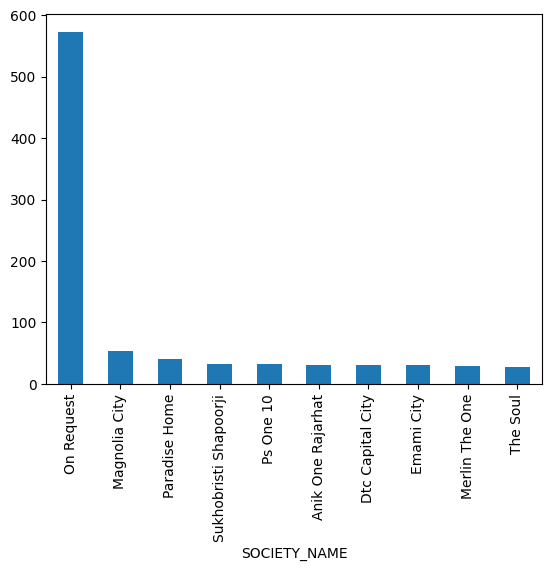

In [291]:
df[df['SOCIETY_NAME']!='on request']['SOCIETY_NAME'].value_counts().head(10).plot(kind= 'bar')

### Observation (SOCIETY_NAME):
- 81 missing values.
- 207 (25%) data On Request values.
- Around 208 top socity contains 50% of flats (exclude on request).
    - 1 society has more than 50 flats.
    - 6 society has 30-50 flats.
    - 77 society has 10-29 flats.
    - 526 society has 2-9 flats.
    - 1258 society has single flats.

### location

In [292]:
df['location'].value_counts()

location
New Town       714
Rajarhat       363
Tollygunge     217
EM Bypass      190
Narendrapur    148
              ... 
Basunagar        1
Usha Park        1
Atghara          1
Sreerampur       1
Purbachal        1
Name: count, Length: 449, dtype: int64

In [293]:
df['location'].str.strip().str.lower().value_counts()

location
new town             714
rajarhat             363
tollygunge           217
em bypass            190
narendrapur          148
                    ... 
gora bazar             1
tali park              1
vivekananda nagar      1
doltala                1
sn roy road            1
Name: count, Length: 446, dtype: int64

In [294]:
df['location'].str.strip().str.lower().str.title().value_counts()

location
New Town             714
Rajarhat             363
Tollygunge           217
Em Bypass            190
Narendrapur          148
                    ... 
Gora Bazar             1
Tali Park              1
Vivekananda Nagar      1
Doltala                1
Sn Roy Road            1
Name: count, Length: 446, dtype: int64

In [295]:
df['location']=df['location'].str.strip().str.lower().str.title()

In [296]:
df['location'].isnull().sum()

0

<Axes: xlabel='location'>

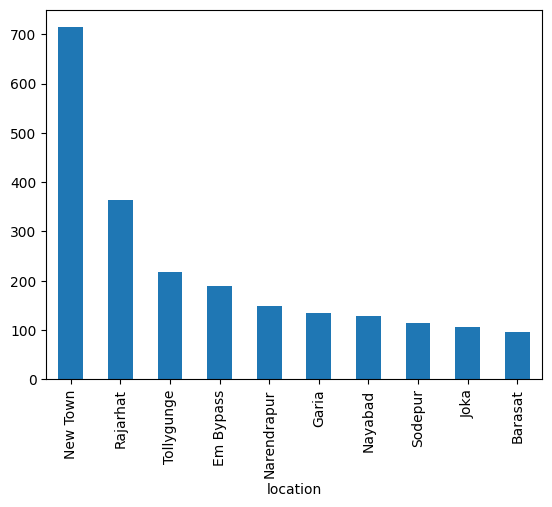

In [297]:
# top 10 location
df['location'].value_counts().head(10).plot(kind = 'bar')

In [298]:
# frequency distribution for society

location_counts = df['location'].value_counts()

location_frequency_bins= {
    "Very High (> 100)" : ((location_counts>= 100).sum()),
    "High (50 - 100)" : ((location_counts>= 50) & (location_counts<=100)).sum(),
    "Avarage (10 - 49)" : ((location_counts>= 10) & (location_counts< 50)).sum(),
    "Low (2 - 9)" : ((location_counts>= 2) & (location_counts< 10)).sum(),
    "Very Low (1)" : (location_counts== 1).sum(),
}

location_frequency_bins

{'Very High (> 100)': 9,
 'High (50 - 100)': 12,
 'Avarage (10 - 49)': 71,
 'Low (2 - 9)': 162,
 'Very Low (1)': 192}

In [299]:
df['location'].value_counts(normalize=True).cumsum().head(15)

location
New Town         0.138238
Rajarhat         0.208519
Tollygunge       0.250532
Em Bypass        0.287318
Narendrapur      0.315973
Garia            0.341917
Nayabad          0.366893
Sodepur          0.388964
Joka             0.409487
Barasat          0.428074
Madhyamgram      0.446467
Kestopur         0.463117
Action Area 1    0.476283
Bt Road          0.489255
Mukundapur       0.501452
Name: proportion, dtype: float64

### Observation (location):
- No missing values.
- There are 446 unique locations.
- Around 15 top location contains 50% of flats.
    - 9 location has more than 100 flats.
    - 12 location has 50 - 100 flats.
    - 71 location has 10 - 49 flats.
    - 161 location has 2-9 flats.
    - 196 location has single flats.

### PRICE:

In [300]:
df['PRICE'].isnull().sum()

0

In [301]:
df['PRICE'].describe()

count    5.165000e+03
mean     4.875961e+04
std      2.772264e+06
min      6.000000e-02
25%      3.500000e-01
50%      5.800000e-01
75%      9.500000e-01
max      1.899960e+08
Name: PRICE, dtype: float64

In [302]:
df['PRICE'].describe().apply(lambda x: f"{x:,.2f}")

count          5,165.00
mean          48,759.61
std        2,772,264.34
min                0.06
25%                0.35
50%                0.58
75%                0.95
max      189,996,000.00
Name: PRICE, dtype: object

<Axes: xlabel='PRICE', ylabel='Count'>

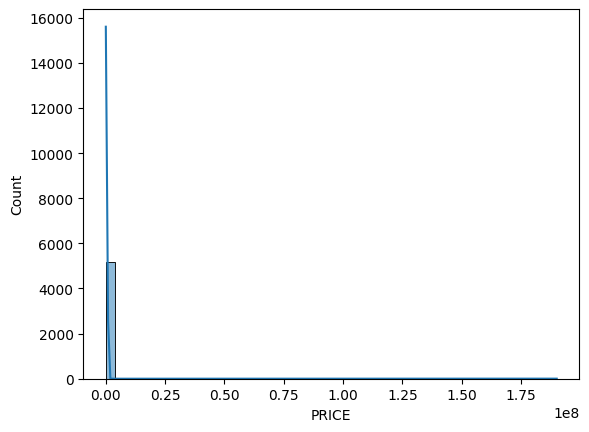

In [303]:
sns.histplot(df['PRICE'], kde=True, bins=50)

In [304]:
# df[['PRICE', 'SOCIETY_NAME']].sort_values(by='PRICE', ascending=False).assign(PRICE=lambda x: x['PRICE'].apply(lambda v: f"{v:,.2f}"))

In [305]:
df.loc[[5021, 3926, 1063, 4620]].assign(PRICE=lambda x: x['PRICE'].apply(lambda v: f"{v:,.2f}"))

,PROP_ID,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,BALCONY_NUM,AREA,Price_per_sqft,FURNISH,FACING,AGE,TOTAL_FLOOR,PROP_NAME,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,FLOOR_NUM,PRICE,feature_luxury,amenity_luxury,LATITUDE,LONGITUDE
5021,S35183221,This is a meticulously designed 4 bhk resale a...,flat,Kolkata South,4.0,1.0,6000,31666.0,Unfurnished,7,6,39.0,Forum Atmosphere,"['6 Religious Places', '3 ATMs', '21 Hospitals...",Forum Atmosphere,Forum Atmosphere,Em Bypass,10,"189,996,000.00",192.0,192.0,22.537334,88.396013
3926,B70752284,"A beautiful luxurious flat ,available in the h...",flat,Kolkata South,4.0,1.0,2996,20026.0,Luxury furnished,0,2,4.0,Ballygunge Apartments,"['1 Religious Place', '1 ATM', '21 Hospitals',...",Ballygunge Apartments,Ballygunge Apartments,Ballygunge,2,"59,997,896.00",NaN,NaN,22.526511,88.360185
1063,L68830584,"Bastu, corner property, free parking, metro rail.",flat,Kolkata South,1.0,1.0,484,2066.0,Luxury furnished,5,3,3.0,NaN,"['2 Religious Places', '15 Hospitals', '1 Phar...",NaN,NaN,Sarsuna,G,"999,944.00",5.0,106.0,22.476847,88.297650
4620,Q53996572,A 1 bhk flat is available for sale in kolkata ...,flat,Kolkata North,1.0,1.0,416,2031.0,Fully furnished,2,2,5.0,Larika township,"['5 Religious Places', '5 Hospitals']",Larika Township,Larika township,Barasat,2,"844,896.00",293.0,293.0,22.735636,88.463418


In [306]:
df.drop([5021, 3926, 1063, 4620],inplace=True)

In [307]:
df['PRICE'].describe()

count    5161.000000
mean        0.895919
std         1.187908
min         0.060000
25%         0.350000
50%         0.580000
75%         0.950000
max        33.000000
Name: PRICE, dtype: float64

<Axes: xlabel='PRICE', ylabel='Count'>

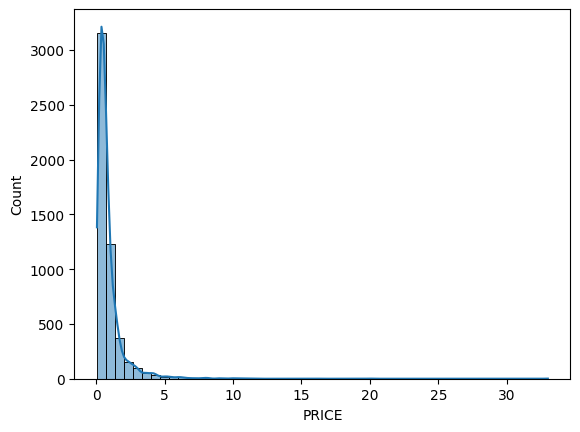

In [308]:
sns.histplot(df['PRICE'], kde=True, bins=50)

In [309]:
df[df['PRICE']==0.060000]

,PROP_ID,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,BALCONY_NUM,AREA,Price_per_sqft,FURNISH,FACING,AGE,TOTAL_FLOOR,PROP_NAME,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,FLOOR_NUM,PRICE,feature_luxury,amenity_luxury,LATITUDE,LONGITUDE
2064,Y71274560,Benificial offer at madhyamgram : Bank instalm...,flat,Kolkata North,1.0,0.0,400,2000.0,Fully furnished,2,6,3.0,VICKY HOUSING COMPLEX,NaN,Vicky Housing Complex,VICKY HOUSING COMPLEX,Madhyamgram Digberia,1,0.06,255.0,357.0,88.378133,22.715388


In [310]:
df[df['PRICE']>=10].shape

(12, 23)

In [311]:
df = df[df['PRICE'] <= 10]

In [312]:
df['PRICE'].describe()

count    5151.000000
mean        0.867855
std         0.960709
min         0.060000
25%         0.350000
50%         0.580000
75%         0.950000
max        10.000000
Name: PRICE, dtype: float64

<Axes: xlabel='PRICE', ylabel='Count'>

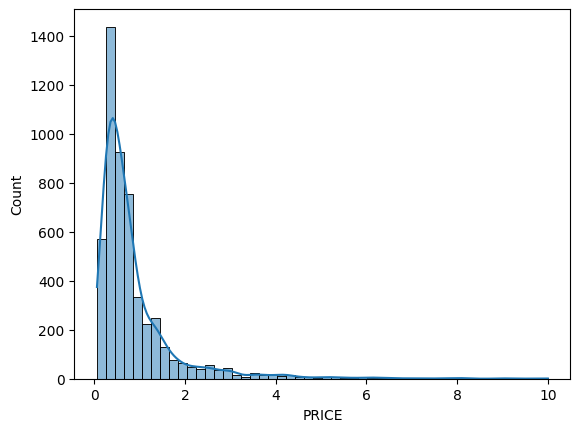

In [313]:
sns.histplot(df['PRICE'], kde=True, bins=50)

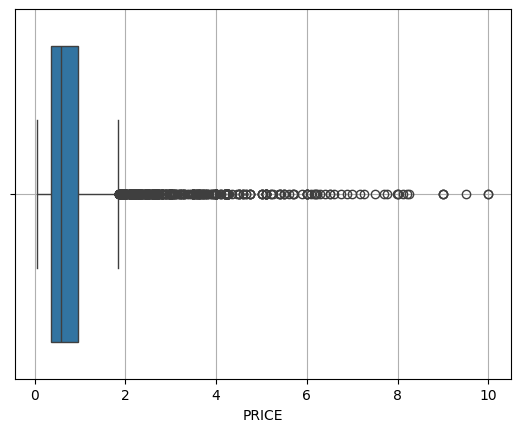

In [314]:
sns.boxplot(x = df['PRICE'])
plt.grid()

### Descriptive Statistics:
- There are 5151 non-missing price entries.
    - Avarage Price                : 86.78 Lakh.
    - Median Price (50 percentile) : 58 Lakh.
    - Standard Deviation           : 0.96, which indicates variability in the price.
    - Price Range                  : 6 Lakh to 10Cr.
    - IQR (Interquartile Range)    : 35 Lakh to 95 Lakh (Difference between 25th percentile to 75th percentile).
 ###
     
- Vizualization:
    - Distribution              : The histogram indicates that most properties are priced in the lower range (below 5 Cr).
    - Box Plot                  : The box plot showcase the spread of the data and potential outliers. Properties priced above approximately 4 Cr might be considered outliers as they lie beyond the upper whisker of the boxplot.

In [315]:
# skewness and Kurtosisabs
skewness = df['PRICE'].skew()
kurtosis = df['PRICE'].kurt()
print('Skewness: ', skewness, ', Kurtosis: ',kurtosis)

Skewness:  3.724587197769886 , Kurtosis:  19.413458842596636


### Observation:
**Skewness**: The price distribution has a skewness of approximately 3.272, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximatel19.4193. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [316]:
# Quantile Analysis
quantiles = df['PRICE'].quantile([0.01, 0.05,0.25,0.5,0.75, 0.95, 0.99])

quantiles

0.01    0.14
0.05    0.20
0.25    0.35
0.50    0.58
0.75    0.95
0.95    2.65
0.99    5.10
Name: PRICE, dtype: float64

**Quantile Analysis:**

- 1% Quantile: Only 1% of properties are priced below 0.14 crores.
- 5% Quantile: 5% of properties are priced below 0.20 crores.
- 25% Quantile: 25% of properties are priced below 0.35 crores.
- 50% Quantile: 50% of properties are priced below 0.58 crores.
- 75% Quantile: 75% of properties are priced below 0.95 crores.
- 95% Quantile: 95% of properties are priced below 2.65 crores.
- 99% Quantile: 99% of properties are priced below 5.10 crores, indicating that very few properties are priced above this value.

In [317]:
# Identify potential outliers using IQR method
Q1 = df['PRICE'].describe()['25%']
Q3 = df['PRICE'].describe()['75%']
IQR = Q3 - Q1

IQR

0.6

In [318]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-0.5499999999999999 1.8499999999999999


In [319]:
outliers = df[(df['PRICE'] < lower_bound) | (df['PRICE'] > upper_bound)]
outliers.shape

(465, 23)

In [320]:
outliers['PRICE'].describe()

count    465.000000
mean       3.297398
std        1.508525
min        1.850000
25%        2.250000
50%        2.800000
75%        3.900000
max       10.000000
Name: PRICE, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 465 properties considered as outliers.
- These outliers have an average price of approximately 3.29 crores.
- The range for these outliers is from 1.85 crores to 10 crores.

<Axes: xlabel='PRICE'>

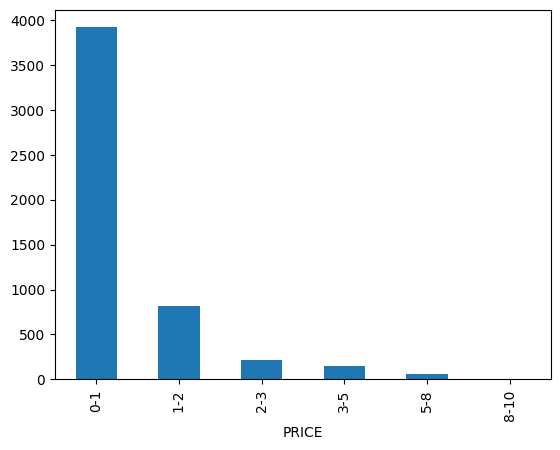

In [321]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-8", "8-10"]
pd.cut(df['PRICE'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "0-1 crores" and "1-2 crores" ranges.
- There's a significant drop in the number of properties priced above "2 crores".

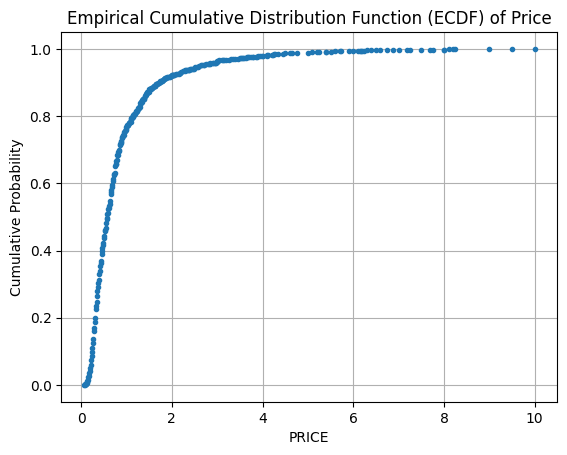

In [322]:
# ECDF(Empirical Cumulative Distribution Function) plot
ecdf = df['PRICE'].value_counts().sort_index().cumsum() / len(df['PRICE'])

# Plot ECDF
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.xlabel('PRICE')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Price')
plt.grid(True)
plt.show()

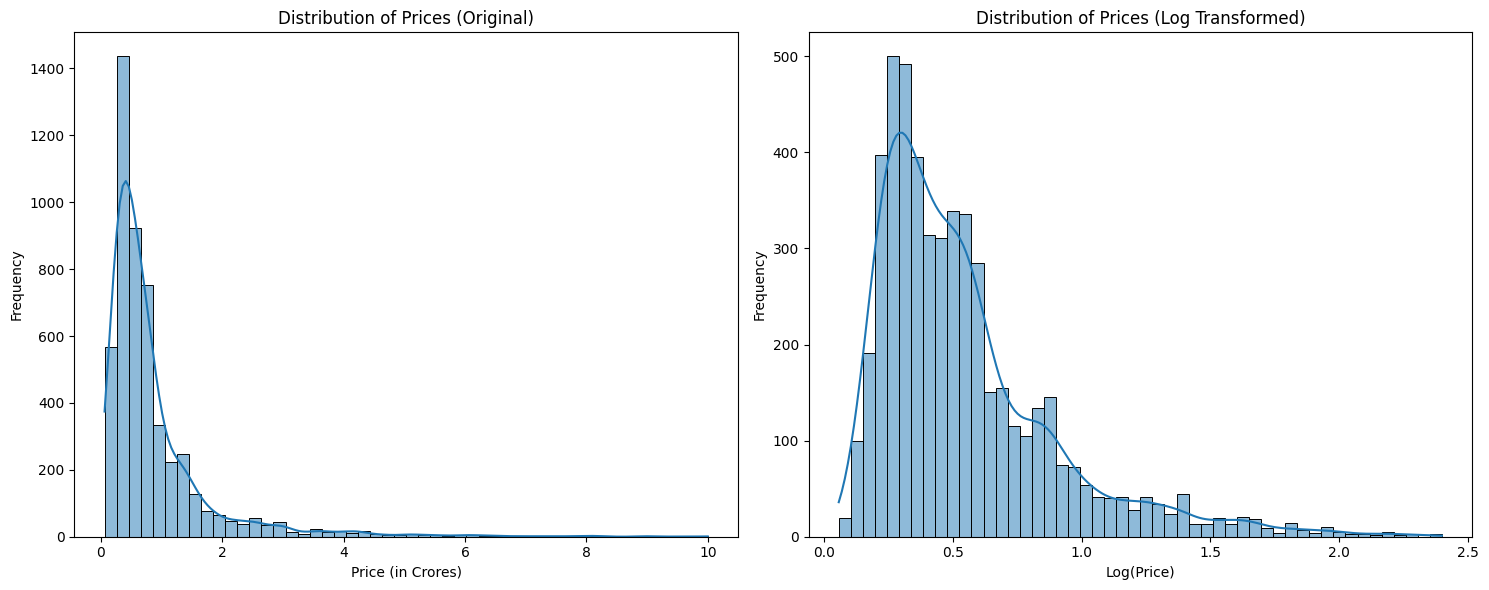

In [323]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['PRICE'], kde=True, bins=50)
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['PRICE']), kde=True, bins=50)
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [324]:
skewness = np.log1p(df['PRICE']).skew()
kurtosis = np.log1p(df['PRICE']).kurt()

print(skewness,kurtosis)

1.7107993801575614 3.5226293923535215


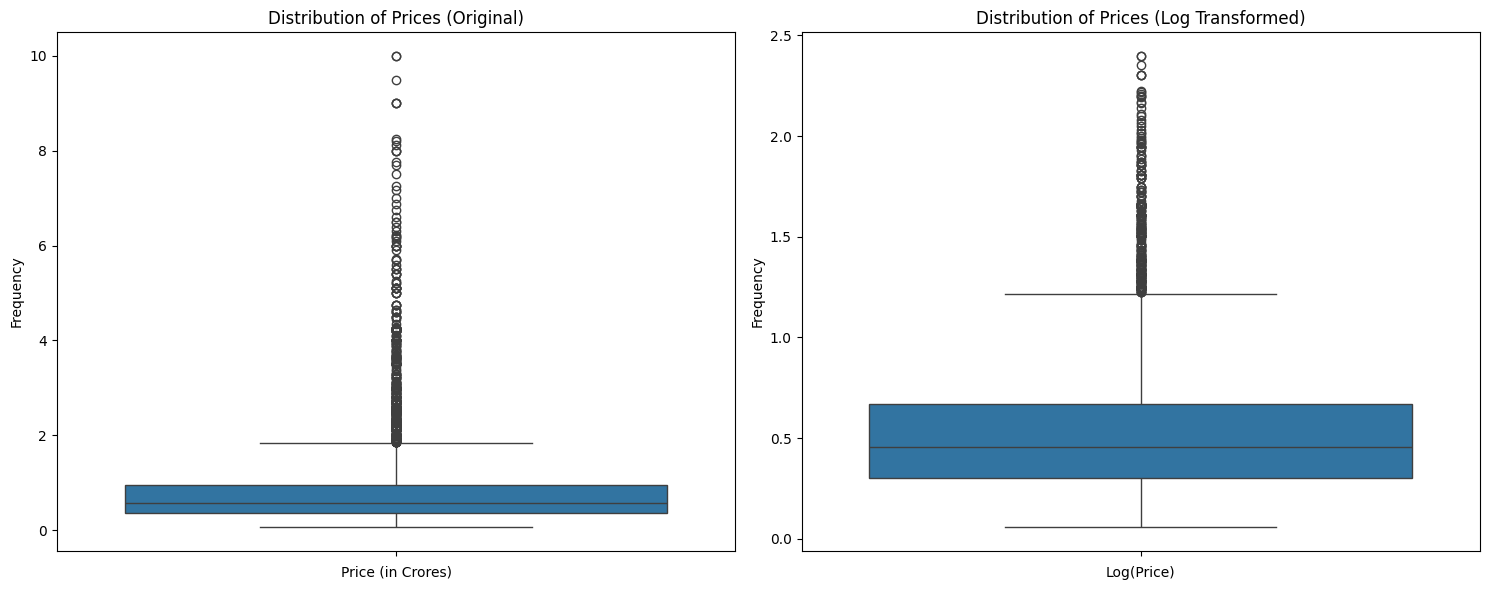

In [325]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['PRICE'])
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['PRICE']))
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [326]:
df.columns

Index(['PROP_ID', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM',
       'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'FURNISH', 'FACING', 'AGE',
       'TOTAL_FLOOR', 'PROP_NAME', 'FORMATTED_LANDMARK_DETAILS',
       'SOCIETY_NAME', 'BUILDING_NAME', 'location', 'FLOOR_NUM', 'PRICE',
       'feature_luxury', 'amenity_luxury', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

### 'Price_per_sqft':

In [327]:
df['Price_per_sqft'].isnull().sum()

0

In [328]:
df['Price_per_sqft'].describe()

count     5151.00000
mean      6261.60299
std       3404.76066
min       2000.00000
25%       3957.50000
50%       5300.00000
75%       7476.00000
max      30063.00000
Name: Price_per_sqft, dtype: float64

<Axes: xlabel='Price_per_sqft', ylabel='Count'>

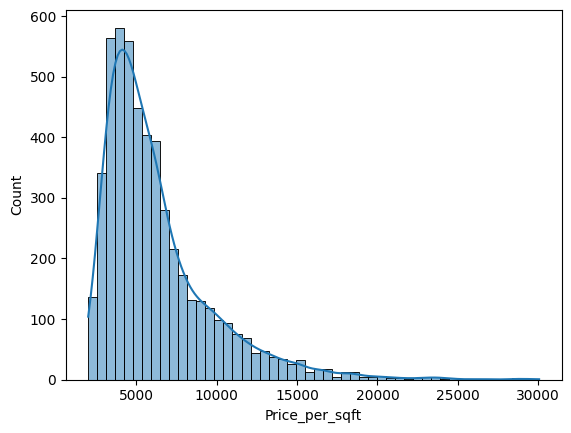

In [329]:
sns.histplot(df['Price_per_sqft'], kde=True, bins=50)

In [330]:
skewness = df['Price_per_sqft'].skew()
kurtosis = df['Price_per_sqft'].kurt()
print('Skewness: ',skewness,'Kurtosis', kurtosis)

Skewness:  1.9151669479973255 Kurtosis 5.237319078634672


<Axes: ylabel='Price_per_sqft'>

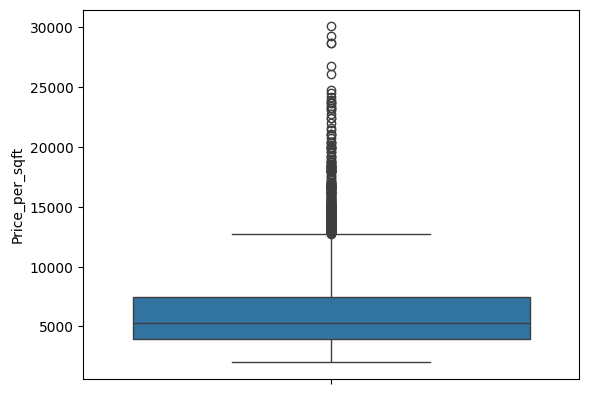

In [331]:
sns.boxplot(df['Price_per_sqft'])

<Axes: xlabel='Price_per_sqft', ylabel='Count'>

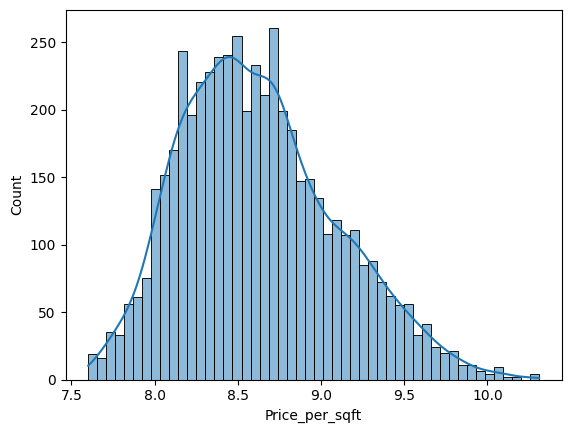

In [332]:
sns.histplot(np.log1p(df['Price_per_sqft']), kde=True, bins=50)

In [333]:
skewness = np.log1p(df['Price_per_sqft']).skew()
kurtosis = np.log1p(df['Price_per_sqft']).kurt()
print(skewness , kurtosis)

0.48902293093300664 -0.09712406035455468


<Axes: ylabel='Price_per_sqft'>

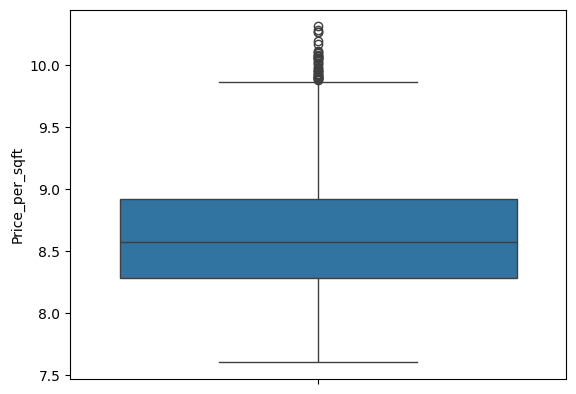

In [334]:
sns.boxplot(np.log1p(df['Price_per_sqft']))

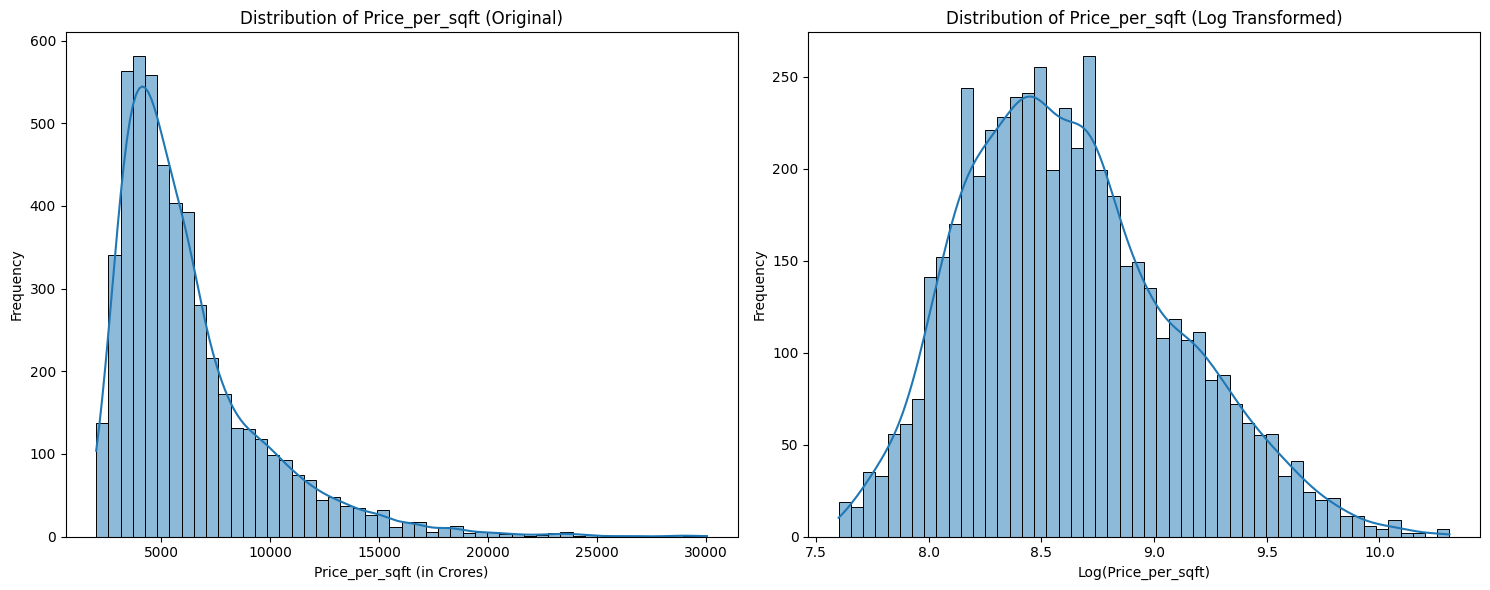

In [335]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['Price_per_sqft'], kde=True, bins=50)
plt.title('Distribution of Price_per_sqft (Original)')
plt.xlabel('Price_per_sqft (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Price_per_sqft']), kde=True, bins=50)
plt.title('Distribution of Price_per_sqft (Log Transformed)')
plt.xlabel('Log(Price_per_sqft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

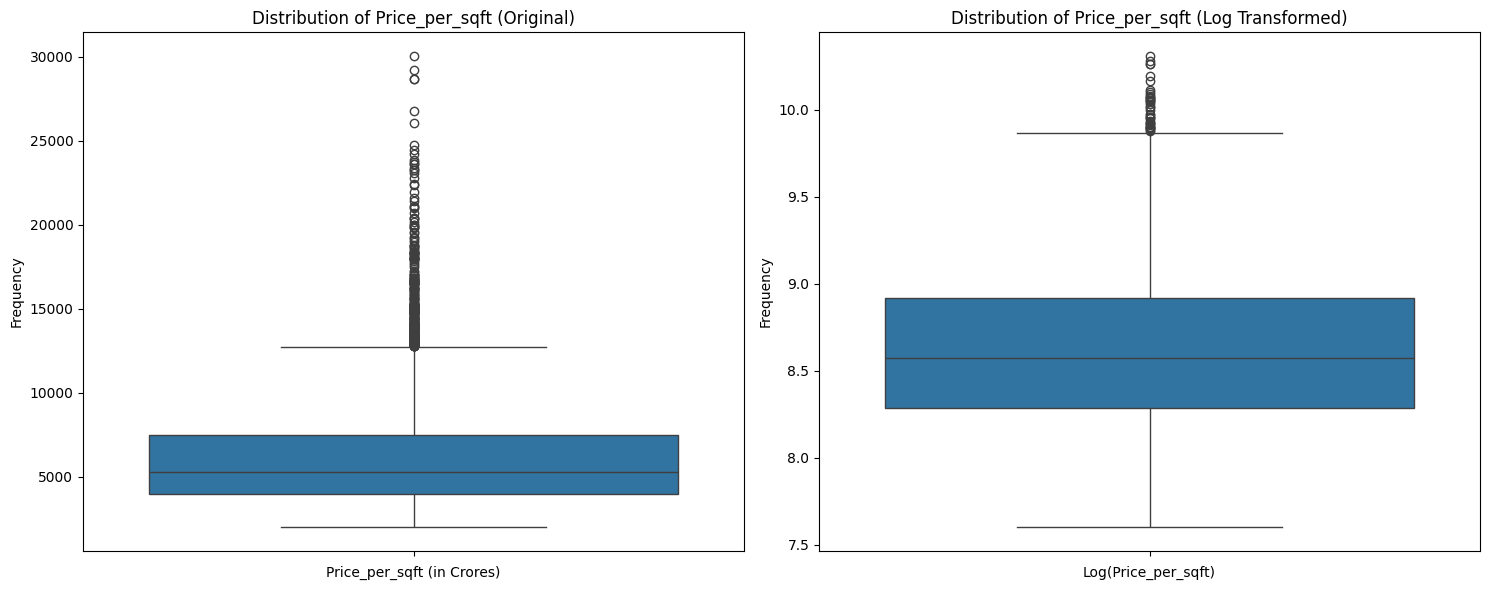

In [336]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['Price_per_sqft'])
plt.title('Distribution of Price_per_sqft (Original)')
plt.xlabel('Price_per_sqft (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['Price_per_sqft']))
plt.title('Distribution of Price_per_sqft (Log Transformed)')
plt.xlabel('Log(Price_per_sqft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Obsevation (Price_per_sqft):
- No missing values.
- Summary:
    - Avarage Price per sq.ft. 6.26 thousand.
    - Standar deviation is 3404.76, which shows variability of data.
    - 25% properties price per sq.ft is 3.95 thousand.
    - 50% properties price per sq.ft is 5.3 thousand.
    - 75% properties price per sq.ft is 7.4 thousand.
- Skewness:  1.91 and Kurtosis 5.23, that indicates data is slight positively Skewed.
- Boxplot shows potential outliers.

### BEDROOM_NUM

In [337]:
df['BEDROOM_NUM'].isnull().sum()

0

In [338]:
df['BEDROOM_NUM'].describe()

count    5151.000000
mean        2.622792
std         0.764514
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         9.000000
Name: BEDROOM_NUM, dtype: float64

<Axes: xlabel='BEDROOM_NUM'>

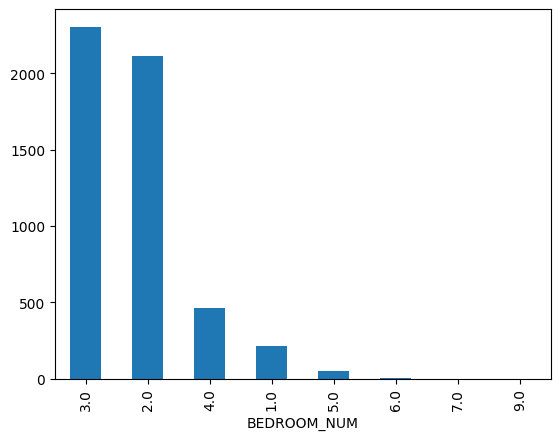

In [339]:
df['BEDROOM_NUM'].value_counts().plot(kind = 'bar')

In [340]:
fig = px.pie(df, names='BEDROOM_NUM', title='Distribution of Number of Bedrooms', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(width=800, height=600)
fig.show()

## Observation (BEDROOM_NUM):
######
- No missing values.
- 1 BHK to 9 BHK are there.
    - Majority flats are 3BHK (44.7%) and 2BHK (41%).
    - Few flats are 4BHK (9.01%).
    - Very few flats are 1BHK (4.14%).
    - Rests are 5,6,7,9 BHK.
    - No preense of 8 BHK.

In [341]:
df.columns

Index(['PROP_ID', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM',
       'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'FURNISH', 'FACING', 'AGE',
       'TOTAL_FLOOR', 'PROP_NAME', 'FORMATTED_LANDMARK_DETAILS',
       'SOCIETY_NAME', 'BUILDING_NAME', 'location', 'FLOOR_NUM', 'PRICE',
       'feature_luxury', 'amenity_luxury', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

# BALCONY_NUM:

In [342]:
df['BALCONY_NUM'].isnull().sum()

472

In [343]:
df['BALCONY_NUM'].value_counts()

BALCONY_NUM
1.0    3558
2.0     810
0.0     151
3.0     125
4.0      35
Name: count, dtype: int64

In [344]:
df['BALCONY_NUM'].describe()

count    4679.000000
mean        1.216713
std         0.576780
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: BALCONY_NUM, dtype: float64

In [345]:
missing_balcony_for_bHK =df[df['BALCONY_NUM'].isnull()][['BEDROOM_NUM','BALCONY_NUM']]

In [346]:
missing_balcony_for_bHK

,BEDROOM_NUM,BALCONY_NUM
0,2.0,NaN
1,1.0,NaN
2,4.0,NaN
3,2.0,NaN
4,3.0,NaN
...,...,...
1086,2.0,NaN
1241,5.0,NaN
1242,4.0,NaN
1243,3.0,NaN


In [347]:
missing_balcony_for_bHK['BEDROOM_NUM'].value_counts()

BEDROOM_NUM
3.0    157
2.0    150
4.0    116
1.0     32
5.0     17
Name: count, dtype: int64

### Observattion (BALCONY_NUM):
- Total 472 missing values.
- Here is the missing value with respect to BHK:
    - 1BHK ==> 32
    - 2BHK ==> 150
    - 3BHK ==> 157
    - 4BHK ==> 116
    - 5BHK ==> 17
    - Most of the flats (75%) has single balcony.
    - No missing values in 6,7,9 BHK


In [348]:
df.columns

Index(['PROP_ID', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM',
       'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'FURNISH', 'FACING', 'AGE',
       'TOTAL_FLOOR', 'PROP_NAME', 'FORMATTED_LANDMARK_DETAILS',
       'SOCIETY_NAME', 'BUILDING_NAME', 'location', 'FLOOR_NUM', 'PRICE',
       'feature_luxury', 'amenity_luxury', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

# FLOOR_NUM:

In [349]:
df['FLOOR_NUM'].isnull().sum()

0

In [350]:
df['FLOOR_NUM'].value_counts().sum()

5151

In [351]:
df['FLOOR_NUM'].unique()

array(['1', '2', '7', '3', 'G', '5', '19', '6', '28', '4', '8', '14',
       '21', '11', '16', '12', '9', '10', '13', '18', '23', '17', '15',
       '20', '27', '26', '22', '25', '34', '33', '24', '0', '30', '31',
       'B'], dtype=object)

In [352]:
df['FLOOR_NUM'] = df['FLOOR_NUM'].apply(lambda x: 0 if x == 'G' else -1 if x == 'B' else int(x))

In [353]:
df['FLOOR_NUM'].value_counts()

FLOOR_NUM
 1     1236
 2      965
 3      846
 4      575
 5      222
 0      148
 8      148
 10     139
 7      138
 6      117
 9       99
 12      90
 11      76
 15      58
 14      54
 17      38
 16      37
 18      33
 13      25
 20      24
 19      21
 21      10
 25       8
 26       7
 22       7
 28       6
 23       5
 27       4
 24       4
 34       3
 30       3
 33       2
 31       2
-1        1
Name: count, dtype: int64

In [354]:
df = df[df['FLOOR_NUM'] != -1]

<Axes: xlabel='FLOOR_NUM'>

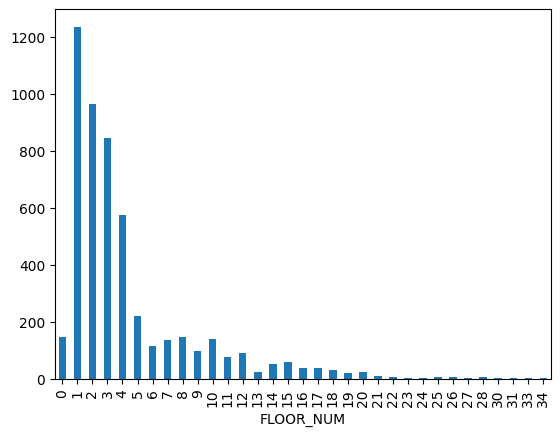

In [355]:
df['FLOOR_NUM'].value_counts().sort_index().plot(kind= 'bar')

<Axes: xlabel='FLOOR_NUM', ylabel='Count'>

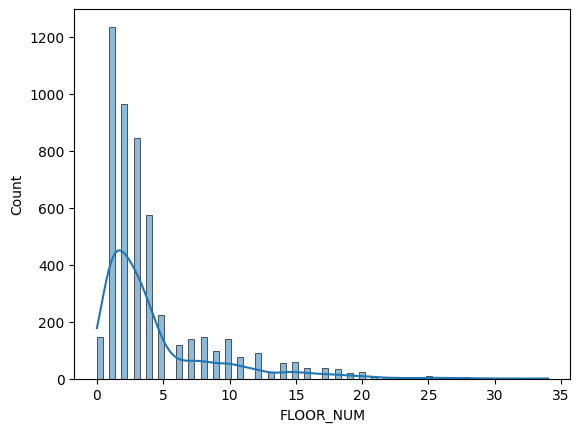

In [356]:
sns.histplot(df['FLOOR_NUM'], kde= True)

In [357]:
df['FLOOR_NUM'].describe()

count    5150.000000
mean        4.345243
std         4.649204
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        34.000000
Name: FLOOR_NUM, dtype: float64

### Observattion (FLOOR_NUM):

- No missing values.
- Flor Distribution:
    - 25% flats are under 1st floor.
    - 50% flats are under 3rd floor.
    - 75% flats are under 5th floor.
    - Top floor is 34th floor.
  


# FACING:

In [358]:
df['FACING'].isnull().sum()

0

<Axes: xlabel='FACING', ylabel='PRICE'>

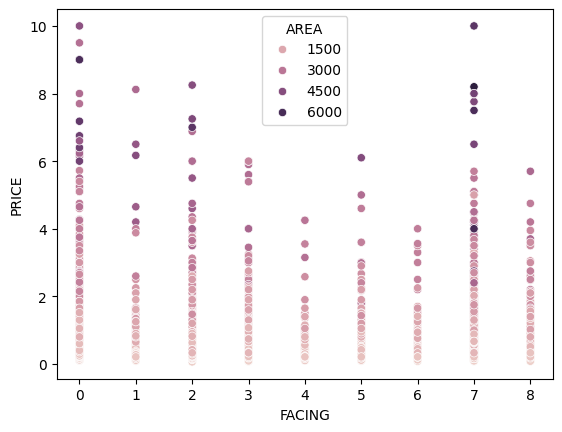

In [359]:
sns.scatterplot(data = df,x = 'FACING', y = 'PRICE',hue = 'AREA')

### Observation:
No significant insights is found.

# AGE :

In [360]:
df['AGE'].isnull().sum()

0

In [361]:
df['AGE'].value_counts()

AGE
1    2182
5    1097
6     829
2     650
3     392
Name: count, dtype: int64

In [362]:
df['AGE'] = df['AGE'].apply(lambda x : 'Relatively New Property' if x <=1 else 'New Property' if x <=2 else 'Moderately Old' if x<=4 else 'Old Property')

In [363]:
df['AGE'].value_counts()

AGE
Relatively New Property    2182
Old Property               1926
New Property                650
Moderately Old              392
Name: count, dtype: int64

<Axes: xlabel='AGE'>

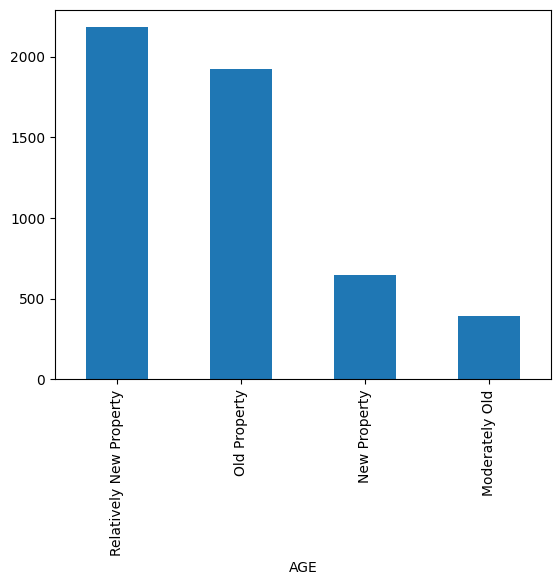

In [364]:
df['AGE'].value_counts().plot(kind= 'bar')

### Observation: 
there are Relatively New Property and Old Property are most frequent as compare to others.

# AREA:

In [365]:
df['AREA'].isnull().sum()

0

In [366]:
df['AREA'].describe()

count    5150.00000
mean     1231.08699
std       612.87673
min       320.00000
25%       851.25000
50%      1090.00000
75%      1422.00000
max      6694.00000
Name: AREA, dtype: float64

<Axes: xlabel='AREA', ylabel='Count'>

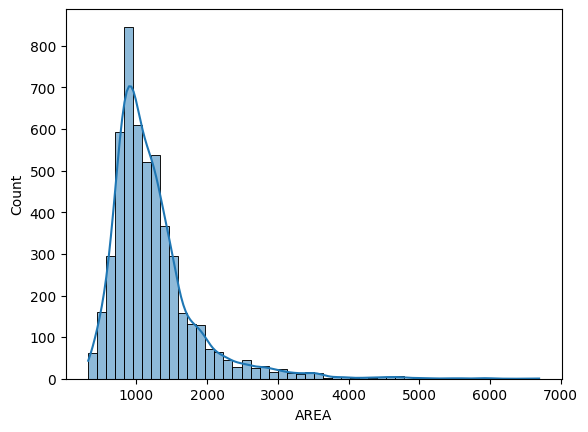

In [367]:
sns.histplot(df['AREA'], kde= True, bins=50)

In [368]:
skewness = df['AREA'].skew()
kurtosis = df['AREA'].kurt()
print(skewness,kurtosis)

2.4840412830065635 10.101020527275693


In [369]:
skewness = np.log1p(df['AREA']).skew()
kurtosis = np.log1p(df['AREA']).kurt()
print(skewness,kurtosis)

0.45593663380428373 0.8713159068856196


<Axes: ylabel='AREA'>

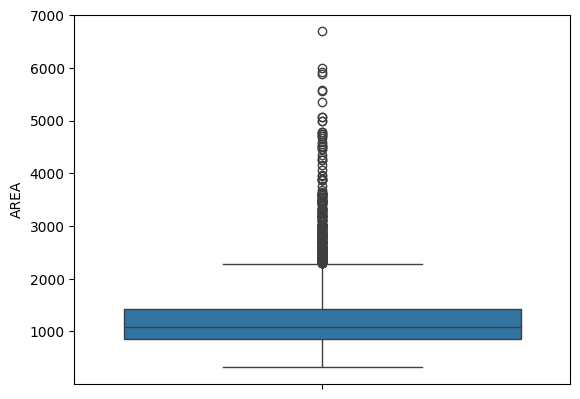

In [370]:
sns.boxplot(df['AREA'])

<Axes: xlabel='AREA', ylabel='Count'>

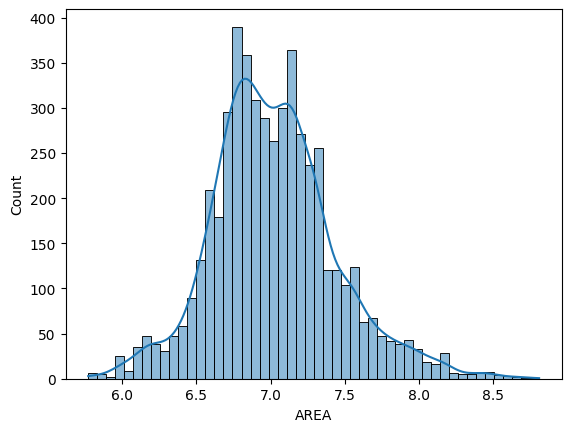

In [371]:
sns.histplot(np.log1p(df['AREA']), kde= True, bins=50)

### AREA Column Analysis

- **Count:** 5,150 entries in the `AREA` column.
- **Mean:** The average area is approximately **1,231.09** square units.
- **Standard Deviation (std):** The area values vary significantly, with a standard deviation of about **612.88** square units, indicating considerable diversity in property sizes.
- **Minimum (min):** The smallest area is **320** square units.
- **25th Percentile (25%):** 25% of the properties have an area less than or equal to **851.25** square units, indicating smaller properties.
- **Median (50%):** The median area is **1,090** square units, meaning half of the properties are smaller than this size.
- **75th Percentile (75%):** 75% of the properties have an area less than or equal to **1,422** square units, showing that larger properties are in the upper quartile.
- **Maximum (max):** The largest area recorded is **6,694** square units, which is significantly higher than the average, indicating the presence of some very large properties in the dataset.
- **Skewness:** The skewness of **2.48** indicates a positive skew, meaning that the distribution has a long right tail, with a few properties having significantly larger areas.
- **Kurtosis:** The kurtosis of **10.10** suggests a leptokurtic distribution, meaning that the dataset has a high peak and heavy tails, indicating the presence of outliers.

This analysis reveals a wide range of property sizes, with most properties clustered around the mean, but a few very large properties skewing the maximum value significantly.

### Boxplot Analysis of `AREA`



- **Central Tendency:** The boxplot shows that the median `AREA` is around 1,090 square units, consistent with the earlier analysis.
- **Interquartile Range (IQR):** The box, representing the IQR, spans from approximately 851.25 to 1,422 square units.
- **Outliers:** There are numerous outliers above the upper whisker, extending beyond 2,000 square units, with some reaching as high as 6,694 square units. This confirms the presence of extremely large properties in the dataset.
- **Skewness:** The significant number of outliers above the upper whisker indicates a positive skew, which aligns with the skewness value of 2.48 mentioned earlier.
- **Spread:** The overall spread of the data is substantial, with the majority of the data points lying between 320 (Lower Whisker) and 2,000 (Upper Whisker) square units, but the presence of outliers significantly increases the maximum value.

This boxplot visually emphasizes the distribution's skewness and the presence of outliers, which heavily influence the overall dataset's statistics.
ll dataset's statistics.
ll dataset's statistics.
ll dataset's statistics.
ignificantly.


In [372]:
df.columns

Index(['PROP_ID', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM',
       'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'FURNISH', 'FACING', 'AGE',
       'TOTAL_FLOOR', 'PROP_NAME', 'FORMATTED_LANDMARK_DETAILS',
       'SOCIETY_NAME', 'BUILDING_NAME', 'location', 'FLOOR_NUM', 'PRICE',
       'feature_luxury', 'amenity_luxury', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

# FURNISH

In [373]:
df['FURNISH'].isnull().sum()

0

In [374]:
df['FURNISH'].value_counts()

FURNISH
Fully furnished     3679
Unfurnished          698
Luxury furnished     533
Semi-furnished       240
Name: count, dtype: int64

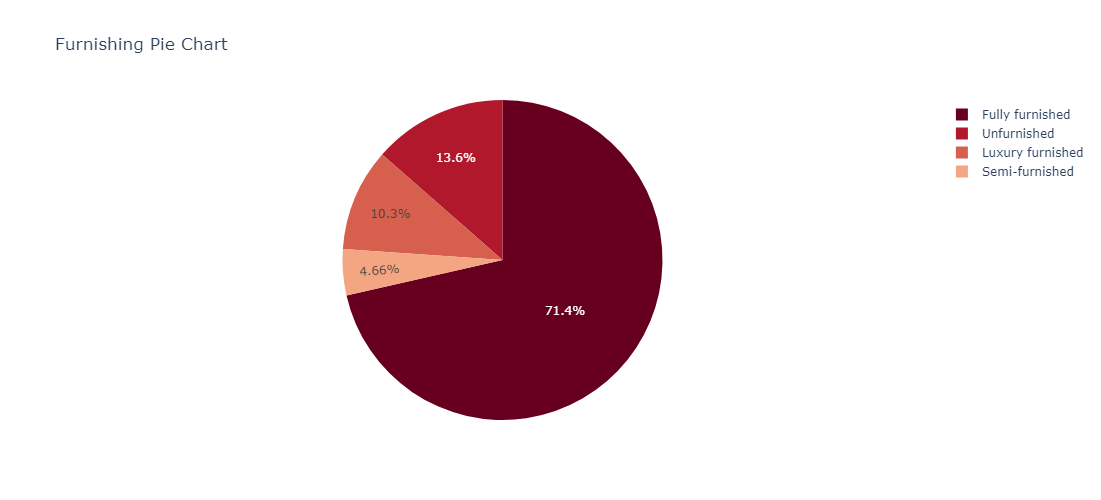

In [375]:
fig = px.pie(df,  names='FURNISH', color_discrete_sequence=px.colors.sequential.RdBu,title='Furnishing Pie Chart')
fig.update_layout(width=600, height=500)
fig.show()

### Property Furnishing Summary

- **Fully Furnished**: 3,679 properties (71.4%)
- **Unfurnished**: 698 properties (13.6%)
- **Luxury Furnished**: 533 properties (10.3%)
- **Semi-Furnished**: 240 properties (4.7%)

**Summary**: The majority of properties (71.4%) are fully furnished, followed by unfurnished (13.5%), luxury furnished (10.3%), and semi-furnished (4.7%).


In [376]:
df.columns

Index(['PROP_ID', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM',
       'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'FURNISH', 'FACING', 'AGE',
       'TOTAL_FLOOR', 'PROP_NAME', 'FORMATTED_LANDMARK_DETAILS',
       'SOCIETY_NAME', 'BUILDING_NAME', 'location', 'FLOOR_NUM', 'PRICE',
       'feature_luxury', 'amenity_luxury', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

# feature_luxury

In [377]:
df['feature_luxury'].isnull().sum()

728

In [383]:
df['amenity_luxury'].isnull().sum()

662

<Axes: xlabel='feature_luxury', ylabel='PRICE'>

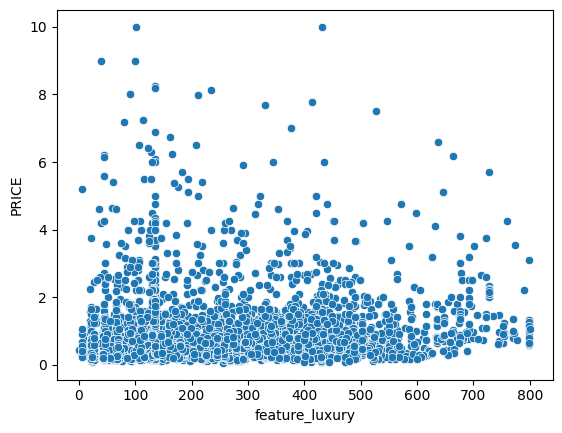

In [378]:
sns.scatterplot( df, x = 'feature_luxury', y = 'PRICE')

<Axes: xlabel='amenity_luxury', ylabel='PRICE'>

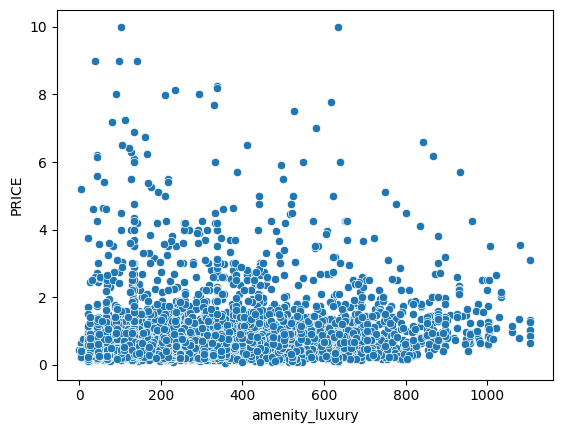

In [379]:
sns.scatterplot( df, x = 'amenity_luxury', y = 'PRICE')

<Axes: xlabel='amenity_luxury', ylabel='feature_luxury'>

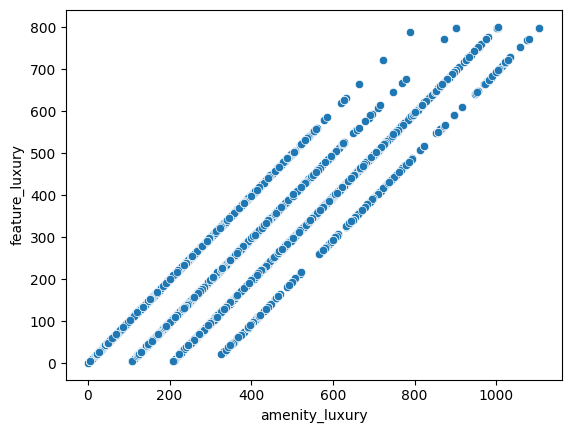

In [382]:
sns.scatterplot( df, x = 'amenity_luxury', y = 'feature_luxury')

In [384]:
df.drop(columns='feature_luxury',inplace= True)

In [388]:
df.columns

Index(['PROP_ID', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM',
       'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'FURNISH', 'FACING', 'AGE',
       'TOTAL_FLOOR', 'PROP_NAME', 'FORMATTED_LANDMARK_DETAILS',
       'SOCIETY_NAME', 'BUILDING_NAME', 'location', 'FLOOR_NUM', 'PRICE',
       'amenity_luxury', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

# amenity_luxury

In [389]:
df['amenity_luxury'].isnull().sum()

662

<Axes: xlabel='amenity_luxury', ylabel='PRICE'>

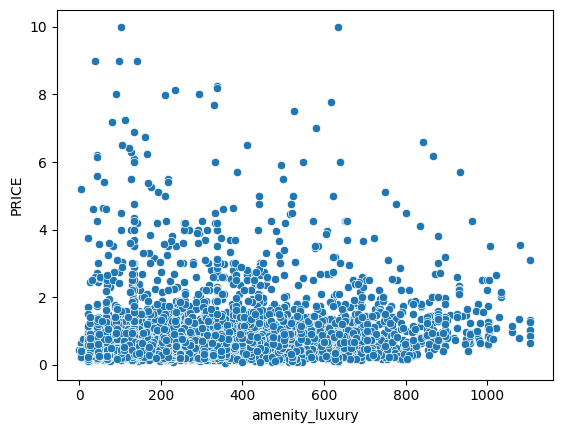

In [390]:
sns.scatterplot( df, x = 'amenity_luxury', y = 'PRICE')

### Observation:

In [392]:
df['amenity_luxury'].describe()

count    4488.000000
mean      331.911988
std       223.662666
min         1.000000
25%       149.000000
50%       291.000000
75%       469.250000
max      1105.000000
Name: amenity_luxury, dtype: float64

<Axes: xlabel='amenity_luxury', ylabel='Count'>

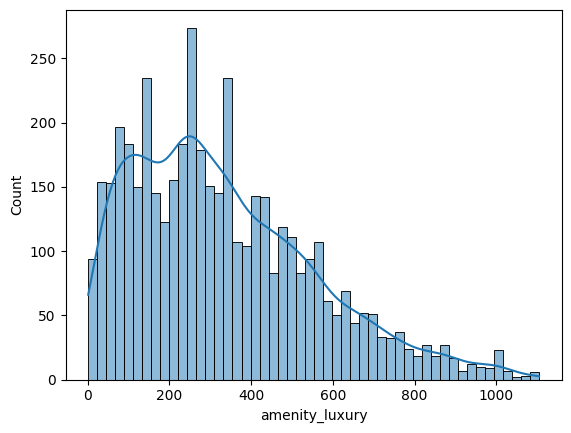

In [394]:
sns.histplot(df['amenity_luxury'], kde= True, bins=50)

In [395]:
skewness = df['amenity_luxury'].skew()
kurtosis = df['amenity_luxury'].kurt()
print('Skewness: ', skewness, ' Kurtosis: ',kurtosis)

Skewness:  0.8216655684849744  Kurtosis:  0.26273065523288697


<Axes: ylabel='amenity_luxury'>

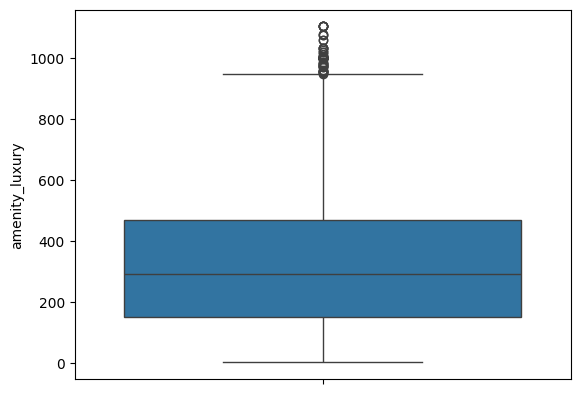

In [397]:
sns.boxplot(df['amenity_luxury'])

- 662 missing values.
#### Distribution Analysis
- **Skewness**: 0.82
  - The skewness value of 0.82 indicates a moderate positive skew. This suggests that the distribution has a tail extending to the right, meaning there are more higher values that stretch beyond the mean compared to lower values.
  
- **Kurtosis**: 0.26
  - The kurtosis value of 0.26 indicates that the distribution is slightly platykurtic, meaning it has a lower peak and thinner tails compared to a normal distribution. The data is relatively spread out with fewer extreme outliers.

#### Insights
- The majority of the `amenity_luxury` values are concentrated between 149 and 469.25 (the interquartile range).
- The mean is higher than the median, further confirming the positive skew in the distribution.
- With a maximum value of 1105, some properties have significantly higher `amenity_luxury` scores, contributing to the positive skewness.

In [402]:
df.shape

(5150, 22)

In [399]:
df['FORMATTED_LANDMARK_DETAILS']

0       ['5 Religious Places', '15 Hospitals', '1 Attr...
1       ['3 Metro Stations', '9 Religious Places', '3 ...
2       ['1 Shopping', '1 Education', '1 Hospital', '1...
3       ['1 Shopping', '1 Education', '1 Hospital', '1...
4       ['1 Metro Station', '1 Religious Place', '1 AT...
                              ...                        
5166    ['1 Shopping', '8 Religious Places', '4 ATMs',...
5167    ['1 Shopping', '5 Religious Places', '5 ATMs',...
5168    ['1 Metro Station', '14 Religious Places', '3 ...
5169    ['1 Metro Station', '14 Religious Places', '3 ...
5170    ['2 Religious Places', '3 ATMs', '5 Hospitals'...
Name: FORMATTED_LANDMARK_DETAILS, Length: 5150, dtype: object

In [403]:
order = ['PROP_ID','PROPERTY_TYPE','SOCIETY_NAME','CITY','location','BEDROOM_NUM','BALCONY_NUM',
         'AREA','Price_per_sqft','PRICE','AGE','FACING','FURNISH','amenity_luxury','FLOOR_NUM',
         'LATITUDE', 'LONGITUDE','PROP_NAME','BUILDING_NAME','TOTAL_FLOOR','FORMATTED_LANDMARK_DETAILS','DESCRIPTION']

In [406]:
df = df[order]

In [407]:
df.sample()

,PROP_ID,PROPERTY_TYPE,SOCIETY_NAME,CITY,location,BEDROOM_NUM,BALCONY_NUM,AREA,Price_per_sqft,PRICE,AGE,FACING,FURNISH,amenity_luxury,FLOOR_NUM,LATITUDE,LONGITUDE,PROP_NAME,BUILDING_NAME,TOTAL_FLOOR,FORMATTED_LANDMARK_DETAILS,DESCRIPTION
3764,G69636164,flat,Rosewood Apartment,Kolkata South,Ramlal Bazaar,2.0,1.0,1004,5029.0,0.5,Old Property,7,Fully furnished,270.0,3,22.515743,88.381121,Rosewood Apartment,Rosewood Apartment,4.0,"['5 Religious Places', '2 ATMs', '14 Hospitals...",The property is a 3 sides open spacious 2bhk a...


In [409]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'SOCIETY_NAME', 'CITY', 'location',
       'BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'AGE',
       'FACING', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM', 'LATITUDE',
       'LONGITUDE', 'PROP_NAME', 'BUILDING_NAME', 'TOTAL_FLOOR',
       'FORMATTED_LANDMARK_DETAILS', 'DESCRIPTION'],
      dtype='object')

In [410]:
df.drop(columns='BUILDING_NAME',inplace=True)

C:\Users\dipan\AppData\Local\Temp\ipykernel_8280\502563862.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [411]:
df.shape

(5150, 21)

In [412]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'SOCIETY_NAME', 'CITY', 'location',
       'BEDROOM_NUM', 'BALCONY_NUM', 'AREA', 'Price_per_sqft', 'PRICE', 'AGE',
       'FACING', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM', 'LATITUDE',
       'LONGITUDE', 'PROP_NAME', 'TOTAL_FLOOR', 'FORMATTED_LANDMARK_DETAILS',
       'DESCRIPTION'],
      dtype='object')

In [414]:
# df.to_csv('treated_v1.csv',index= False)